In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

/home/pratt/anaconda3/envs/ml/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


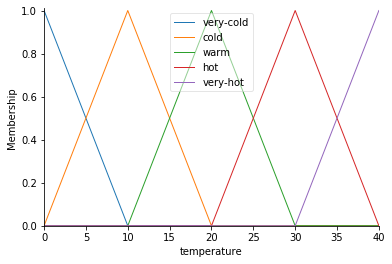

In [2]:
temperature = ctrl.Antecedent(np.arange(0, 50, 10), 'temperature')
temperature['very-cold'] = fuzzy.trimf(temperature.universe, [0, 0, 10])
temperature['cold'] = fuzzy.trimf(temperature.universe, [0, 10, 20])
temperature['warm'] = fuzzy.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzzy.trimf(temperature.universe, [20, 30, 40])
temperature['very-hot'] = fuzzy.trimf(temperature.universe, [30, 40, 50])
temperature.view()

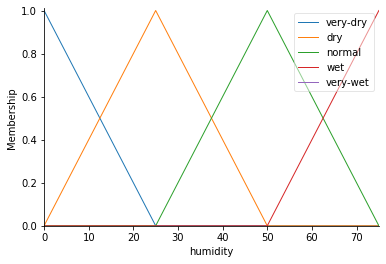

In [3]:
humidity = ctrl.Antecedent(np.arange(0, 100, 25), 'humidity')
humidity['very-dry'] = fuzzy.trimf(humidity.universe, [0, 0, 25])
humidity['dry'] = fuzzy.trimf(humidity.universe, [0, 25, 50])
humidity['normal'] = fuzzy.trimf(humidity.universe, [25, 50, 75])
humidity['wet'] = fuzzy.trimf(humidity.universe, [50, 75, 100])
humidity['very-wet'] = fuzzy.trimf(humidity.universe, [75, 100, 125])
humidity.view()

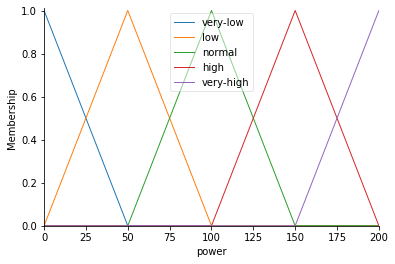

In [4]:
power = ctrl.Consequent(np.arange(0, 250, 50), 'power')
power['very-low'] = fuzzy.trimf(power.universe, [0, 0, 50])
power['low'] = fuzzy.trimf(power.universe, [0, 50, 100])
power['normal'] = fuzzy.trimf(power.universe, [50, 100, 150])
power['high'] = fuzzy.trimf(power.universe, [100, 150, 200])
power['very-high'] = fuzzy.trimf(power.universe, [150, 200, 250])
power.view()

In [5]:
rules = []
rules.append(ctrl.Rule(temperature['very-cold'] & humidity['very-dry'], power['very-low']))
rules.append(ctrl.Rule(temperature['very-cold'] & humidity['dry'], power['very-low']))
rules.append(ctrl.Rule(temperature['very-cold'] & humidity['normal'], power['low']))
rules.append(ctrl.Rule(temperature['very-cold'] & humidity['wet'], power['low']))
rules.append(ctrl.Rule(temperature['very-cold'] & humidity['very-wet'], power['low']))

In [6]:
rules.append(ctrl.Rule(temperature['cold'] & humidity['very-dry'], power['very-low']))
rules.append(ctrl.Rule(temperature['cold'] & humidity['dry'], power['very-low']))
rules.append(ctrl.Rule(temperature['cold'] & humidity['normal'], power['low']))
rules.append(ctrl.Rule(temperature['cold'] & humidity['wet'], power['low']))
rules.append(ctrl.Rule(temperature['cold'] & humidity['very-wet'], power['normal']))

In [7]:
rules.append(ctrl.Rule(temperature['warm'] & humidity['very-dry'], power['low']))
rules.append(ctrl.Rule(temperature['warm'] & humidity['dry'], power['normal']))
rules.append(ctrl.Rule(temperature['warm'] & humidity['normal'], power['normal']))
rules.append(ctrl.Rule(temperature['warm'] & humidity['wet'], power['high']))
rules.append(ctrl.Rule(temperature['warm'] & humidity['very-wet'], power['high']))

In [8]:
rules.append(ctrl.Rule(temperature['hot'] & humidity['very-dry'], power['high']))
rules.append(ctrl.Rule(temperature['hot'] & humidity['dry'], power['high']))
rules.append(ctrl.Rule(temperature['hot'] & humidity['normal'], power['high']))
rules.append(ctrl.Rule(temperature['hot'] & humidity['wet'], power['very-high']))
rules.append(ctrl.Rule(temperature['hot'] & humidity['very-wet'], power['very-high']))

In [9]:
rules.append(ctrl.Rule(temperature['very-hot'] & humidity['very-dry'], power['very-high']))
rules.append(ctrl.Rule(temperature['very-hot'] & humidity['dry'], power['very-high']))
rules.append(ctrl.Rule(temperature['very-hot'] & humidity['normal'], power['very-high']))
rules.append(ctrl.Rule(temperature['very-hot'] & humidity['wet'], power['very-high']))
rules.append(ctrl.Rule(temperature['very-hot'] & humidity['very-wet'], power['very-high']))

In [10]:
controller = ctrl.ControlSystem(rules)
ac_controller = ctrl.ControlSystemSimulation(controller)

In [11]:
def calculate_power(temp, humid):
    ac_controller.input['temperature'] = temp
    ac_controller.input['humidity'] = humid
    ac_controller.compute()
    print("AC POWER OUTPUT (IN WATTS) : ", ac_controller.output['power'])

In [12]:
calculate_power(5, 90)

AC POWER OUTPUT (IN WATTS) :  49.99999999999999


In [13]:
calculate_power(35, 10)

AC POWER OUTPUT (IN WATTS) :  155.95238095238093


In [14]:
calculate_power(23, 38)

AC POWER OUTPUT (IN WATTS) :  119.45311082894975
